In [1]:
# K-Means Clustering Example
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 1. Create simulated dataset
# Set seed for reproducibility
np.random.seed(0)

# Create 50 observations
X = np.random.standard_normal((50, 2))

# Shift first 25 observations to create a distinct cluster
X[:25, 0] += 3
X[:25, 1] -= 4

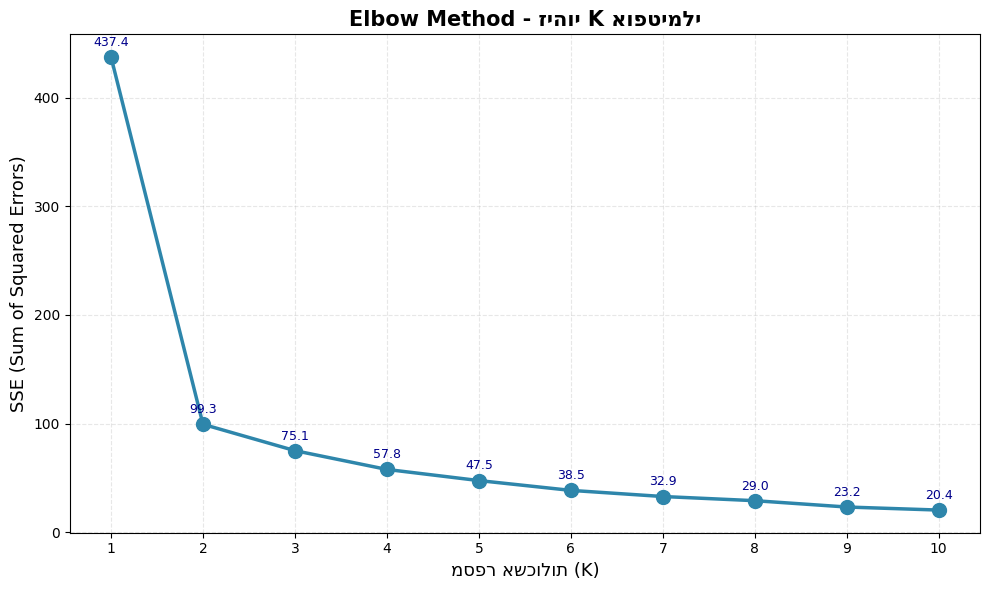


ערכי SSE עבור כל K:
----------------------------------------
K =  1  -->  SSE =   437.37
K =  2  -->  SSE =    99.32
K =  3  -->  SSE =    75.06
K =  4  -->  SSE =    57.77
K =  5  -->  SSE =    47.53
K =  6  -->  SSE =    38.50
K =  7  -->  SSE =    32.86
K =  8  -->  SSE =    29.02
K =  9  -->  SSE =    23.20
K = 10  -->  SSE =    20.38


In [3]:
# 2. Elbow Method - מציאת K אופטימלי
# חישוב SSE עבור ערכי K שונים
k_range = range(1, 11)
sse_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=3, n_init=20).fit(X)
    sse_values.append(kmeans.inertia_)

# שירטוט גרף Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_values, marker='o', linewidth=2.5, markersize=10, color='#2E86AB')
plt.xlabel('מספר אשכולות (K)', fontsize=13)
plt.ylabel('SSE (Sum of Squared Errors)', fontsize=13)
plt.title('Elbow Method - זיהוי K אופטימלי', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(k_range)

# הוספת ערכי SSE על הגרף
for k, sse in zip(k_range, sse_values):
    plt.annotate(f'{sse:.1f}', 
                 xy=(k, sse), 
                 xytext=(0, 8), 
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 color='darkblue')

plt.tight_layout()
plt.show()

print("\nערכי SSE עבור כל K:")
print("-" * 40)
for k, sse in zip(k_range, sse_values):
    print(f"K = {k:2d}  -->  SSE = {sse:8.2f}")

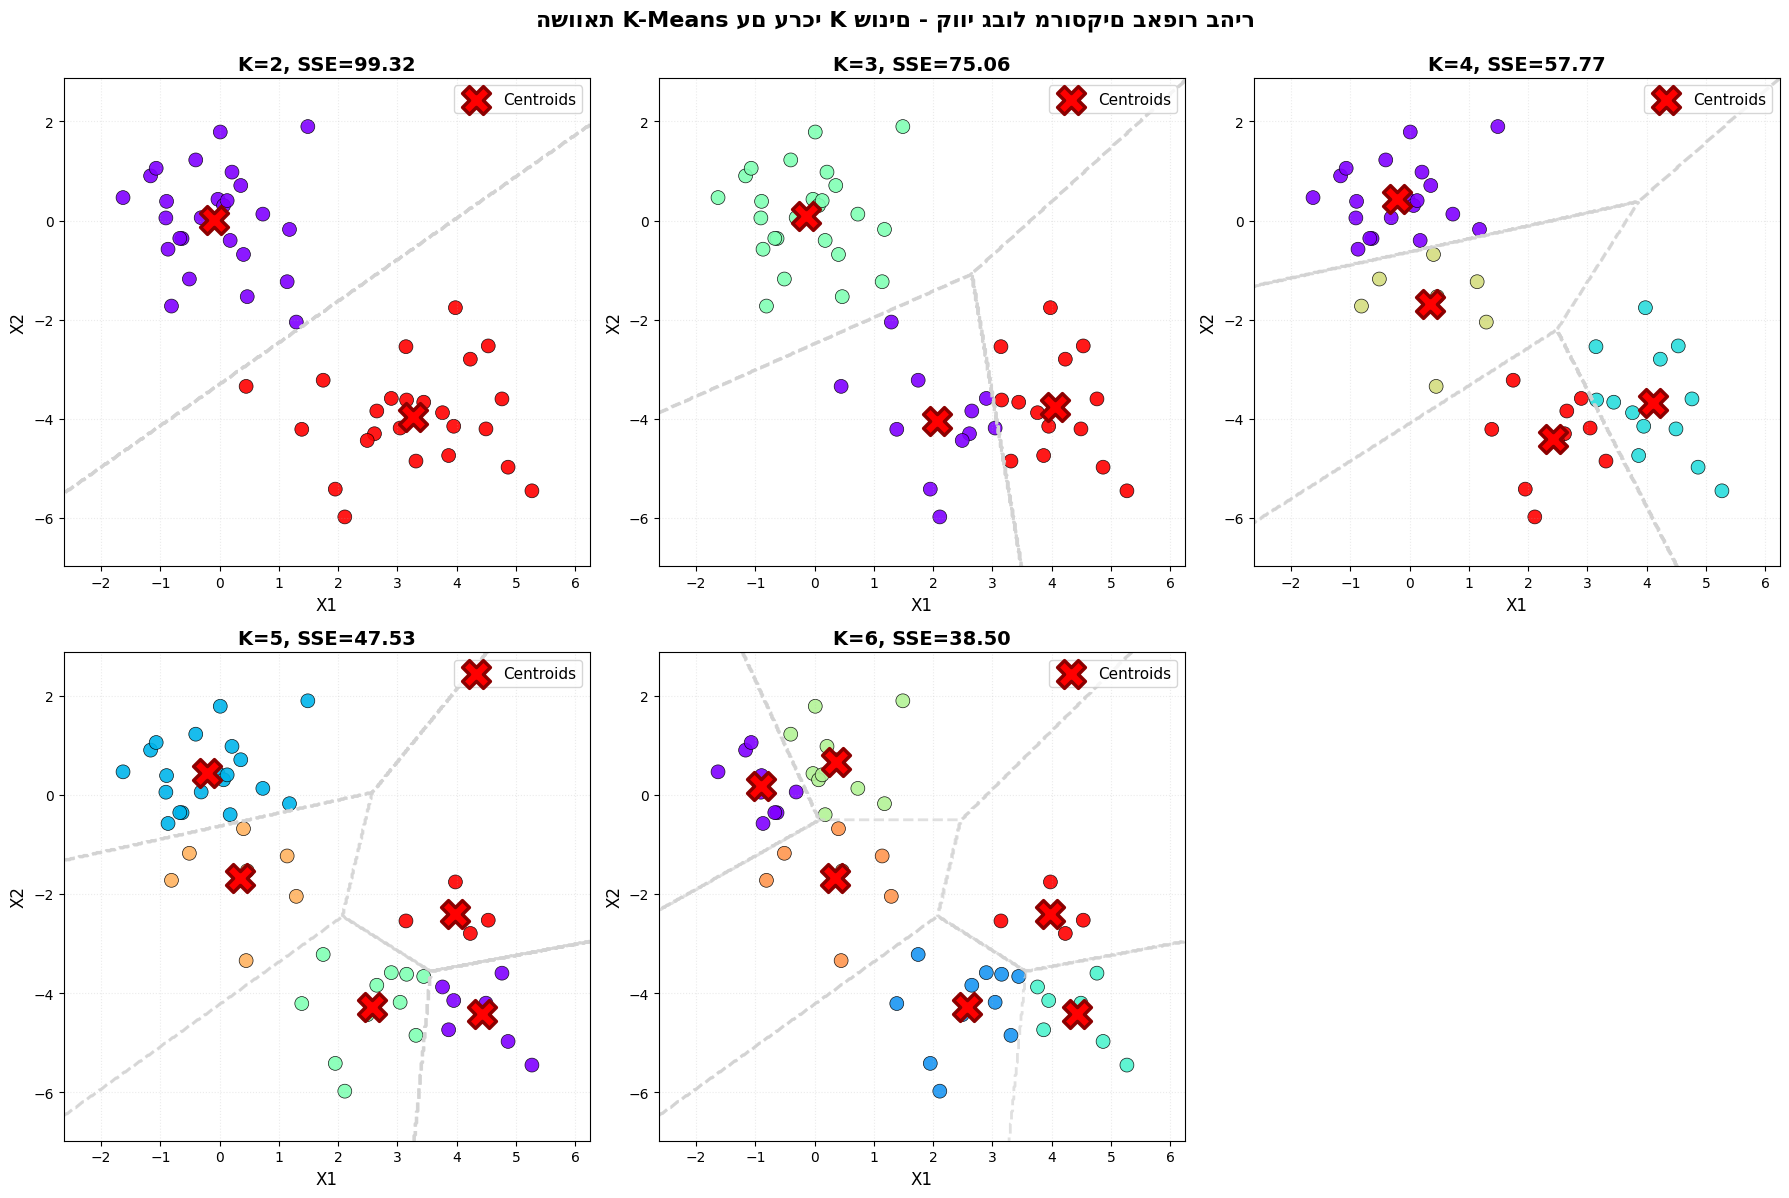

In [4]:
# 3. השוואת ערכי K שונים עם קווי גבול
k_values = [2, 3, 4, 5, 6]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=3, n_init=20).fit(X)
    
    # יצירת רשת לקווי הגבול
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # חיזוי עבור כל נקודה
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # שירטוט קווי גבול אפורים בהירים ומרוסקים
    axes[idx].contour(xx, yy, Z, colors='lightgray', linewidths=2, 
                     linestyles='dashed', alpha=0.7)
    
    # שירטוט הנקודות
    scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, 
                                cmap=plt.cm.rainbow, s=100, 
                                edgecolors='black', linewidth=0.5, alpha=0.9)
    
    # שירטוט המרכזים
    axes[idx].scatter(kmeans.cluster_centers_[:, 0],
                      kmeans.cluster_centers_[:, 1],
                      marker='X', s=400, c='red', 
                      edgecolors='darkred', linewidth=2.5, 
                      label='Centroids', zorder=5)
    
    axes[idx].set_title(f'K={k}, SSE={kmeans.inertia_:.2f}', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('X1', fontsize=12)
    axes[idx].set_ylabel('X2', fontsize=12)
    axes[idx].legend(fontsize=11)
    axes[idx].grid(True, alpha=0.25, linestyle=':')

# הסתרת התא האחרון
axes[5].axis('off')

plt.suptitle('השוואת K-Means עם ערכי K שונים - קווי גבול מרוסקים באפור בהיר', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()